# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

# Importing the dataset

In [3]:
dataset = pd.read_csv("Salary Data.csv")

In [ ]:
print(dataset)

      Age  Gender Education Level                      Job Title  \
0    32.0    Male      Bachelor's              Software Engineer   
1    28.0  Female        Master's                   Data Analyst   
2    45.0    Male             PhD                 Senior Manager   
3    36.0  Female      Bachelor's                Sales Associate   
4    52.0    Male        Master's                       Director   
..    ...     ...             ...                            ...   
370  35.0  Female      Bachelor's       Senior Marketing Analyst   
371  43.0    Male        Master's         Director of Operations   
372  29.0  Female      Bachelor's         Junior Project Manager   
373  34.0    Male      Bachelor's  Senior Operations Coordinator   
374  44.0  Female             PhD        Senior Business Analyst   

     Years of Experience    Salary  
0                    5.0   90000.0  
1                    3.0   65000.0  
2                   15.0  150000.0  
3                    7.0   60000.0 

# Separating into features and target (Dependent and Independent variables)

In [4]:
X = dataset.iloc[:, : - 1].values
y = dataset.iloc[:, -1].values


In [ ]:
print(X)
print(y)

[[32.0 'Male' "Bachelor's" 'Software Engineer' 5.0]
 [28.0 'Female' "Master's" 'Data Analyst' 3.0]
 [45.0 'Male' 'PhD' 'Senior Manager' 15.0]
 ...
 [29.0 'Female' "Bachelor's" 'Junior Project Manager' 2.0]
 [34.0 'Male' "Bachelor's" 'Senior Operations Coordinator' 7.0]
 [44.0 'Female' 'PhD' 'Senior Business Analyst' 15.0]]
[ 90000.  65000. 150000.  60000. 200000.  55000. 120000.  80000.  45000.
 110000.  75000. 140000.  65000. 130000.  40000. 125000.  90000. 115000.
  35000. 180000.  80000. 190000.  50000.  60000. 140000.  45000. 110000.
  40000. 140000.  90000. 250000.  55000.  75000.  65000. 170000.  45000.
  60000. 115000.  40000. 160000.  80000. 190000.  60000.  45000. 130000.
  40000.  75000. 180000. 120000.  35000. 130000.  85000.  60000. 200000.
  50000.  95000.  65000. 140000.  55000. 105000. 170000.  50000.  80000.
 180000.  35000.  90000. 120000.  45000.  90000. 150000.  65000.  70000.
 190000.  40000. 120000.  95000. 160000. 100000. 180000.  55000.  70000.
  80000.  30000. 2

# Handling missing data

Missing data on columns containing numerical values

In [5]:
num_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X[:, [0, 4]] = num_imputer.fit_transform(X[:, [0, 4]])

In [ ]:
print(X)

[[32.0 'Male' "Bachelor's" 'Software Engineer' 5.0]
 [28.0 'Female' "Master's" 'Data Analyst' 3.0]
 [45.0 'Male' 'PhD' 'Senior Manager' 15.0]
 ...
 [29.0 'Female' "Bachelor's" 'Junior Project Manager' 2.0]
 [34.0 'Male' "Bachelor's" 'Senior Operations Coordinator' 7.0]
 [44.0 'Female' 'PhD' 'Senior Business Analyst' 15.0]]


Missing data on columns containing categorical values

In [6]:
categorical_indices = [1, 2, 3]
cat_imputer = SimpleImputer(strategy='most_frequent')
X[:, categorical_indices] = cat_imputer.fit_transform(X[:, categorical_indices])

In [ ]:
print(X)

[[32.0 'Male' "Bachelor's" 'Software Engineer' 5.0]
 [28.0 'Female' "Master's" 'Data Analyst' 3.0]
 [45.0 'Male' 'PhD' 'Senior Manager' 15.0]
 ...
 [29.0 'Female' "Bachelor's" 'Junior Project Manager' 2.0]
 [34.0 'Male' "Bachelor's" 'Senior Operations Coordinator' 7.0]
 [44.0 'Female' 'PhD' 'Senior Business Analyst' 15.0]]


# Encoding categorical values

In [7]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(sparse_output=False), categorical_indices)], remainder='passthrough')


In [8]:
X = ct.fit_transform(X)


In [ ]:
print(X)

[[0.0 1.0 1.0 ... 0.0 32.0 5.0]
 [1.0 0.0 0.0 ... 0.0 28.0 3.0]
 [0.0 1.0 0.0 ... 0.0 45.0 15.0]
 ...
 [1.0 0.0 1.0 ... 0.0 29.0 2.0]
 [0.0 1.0 1.0 ... 0.0 34.0 7.0]
 [1.0 0.0 0.0 ... 0.0 44.0 15.0]]


Handling missing data on target variable

In [9]:
y_imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
y = y_imputer.fit_transform(y.reshape(-1, 1)).flatten()

In [ ]:
print(y)

# Separating into training and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Training Simple Linear Regression model on the training set

In [11]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

#Predicting results

In [12]:
y_pred = regressor.predict(X_test)

In [13]:
years_experience_index = -1

# Visualizing the training result





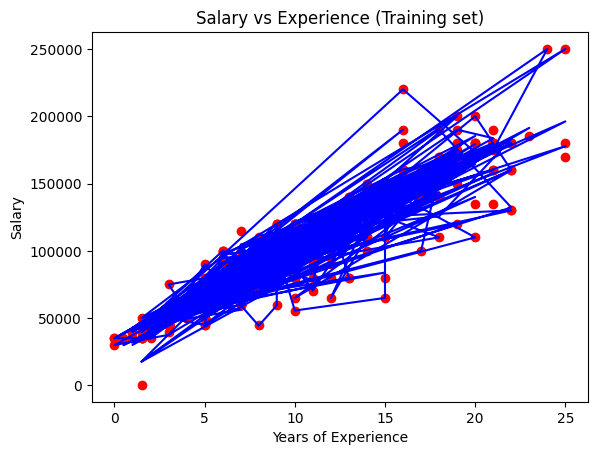

In [14]:
plt.scatter(X_train[:, years_experience_index], y_train, color='red')
plt.plot(X_train[:, years_experience_index], regressor.predict(X_train), color='blue')
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()